# 泰坦尼克号分析报告

## 简介
这是一份乘坐泰坦尼克号乘客的数据，其中包括人口学数据和乘客基本信息，我将通过这个数据集进行探索，来回答一些我所感兴趣的问题。

## 数据探索

### 导入库与数据

In [86]:
# import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import data

titanic = pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


我选取了5行，粗略地观察这个数据集的构成。
* Survived:是否存活，1为存活，0为死亡。
* Pclass:船票的等级（1为上等，2为中等，3为下等）
* Name:乘客的姓名
* Sex:乘客的性别
* Age:乘客的年龄
* SibSp:船上兄弟姐妹、配偶的人数
* Parch:父母、子女的人数
* Ticket:船票的号码
* Fare:船票的价格
* Cabin:船舱的号码
* Embarked:出发港口

## 数据整理

In [3]:
# 首先看一下数据总量
len(titanic)

891

In [4]:
# 查看缺失值
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

在缺失值统计中，可以看到有两块数据严重缺失：年龄和船舱的号码。对于船舱的号码，我决定忽略这方面的影响，一方面是因为它大量缺失，另外一方面这一列的数据仅显示出乘客所睡的船舱具体的号码，对于房间的位置等因素无法挖掘，所以在之后提出问题的阶段，不对这一项数据进行探索。对于年龄，我决定仅在探索与年龄有关的问题时，将缺失年龄的数据剔除，因为缺失年龄的数据占比相对较高，为了不影响数据构成，在研究其他问题（与年龄无关的问题）时，保留这些数据。

In [97]:
# 处理缺失值
# 对于处理无关年龄的问题，使用远DataFrame，titanic。
# 对于处理与年龄有关的问题，我将剔除年龄缺失的行。

# Mapping data

# Mapping sex
# female => 0, male => 1
mapping_sex = {'female':0, 'male':1}
titanic['Sex'] = titanic['Sex'].map(mapping_sex)

# Add Colume:
# FamilySize = SibSp + Parch
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

# Mapping AgeRange
age_bins = [0,20,30,40,60,999]
age_labels = ['20-','20-30','30-40','40-50','60+']
titanic['AgeRange'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

titanic_without_missing_age = titanic[titanic['Age']>0]
# 714 = 891 - 177 符合

print len(titanic_without_missing_age)
titanic.head()

714


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,1,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C,1,30-40
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S,1,30-40
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,S,0,30-40


## 提出问题

* 哪些因素会让船上的人更加容易生还？
* 整体的生还率是多少，生还者和非生还者的性别分布和年龄分布是怎么样的？

## 分析数据

### 生还者的占比

not survived: 549
    survived: 342


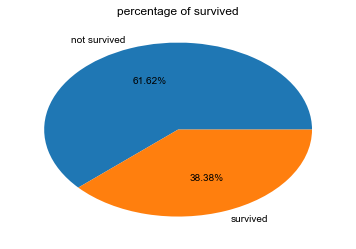

In [93]:
non_survived = titanic[titanic['Survived'] == 0]
survived = titanic[titanic['Survived'] == 1]

print 'not survived: {}'.format(len(non_survived))
print '    survived: {}'.format(len(survived))
%matplotlib inline

labels = ['not survived', 'survived']
X = [len(non_survived), len(survived)]
plt.pie(X, labels=labels, autopct='%1.2f%%')
plt.title('percentage of survived')
plt.show()


## 生还者和非生还者的年龄和性别分布


## 计算相关度


In [90]:
data_cor = titanic[['Survived', 'Age', 'Sex','Pclass','FamilySize','Fare']]
data_cor.head()

,Survived,Age,Sex,Pclass,FamilySize,Fare
0,0,22.0,1,3,1,7.2500
1,1,38.0,0,1,1,71.2833
2,1,26.0,0,3,0,7.9250
3,1,35.0,0,1,1,53.1000
4,0,35.0,1,3,0,8.0500


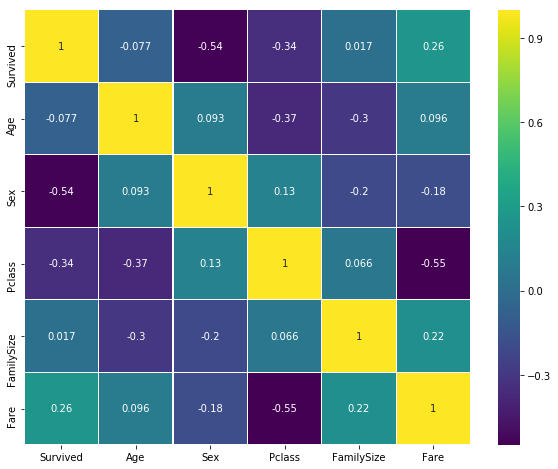

In [92]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,8))
sns.heatmap(data_cor.astype(float).corr(),linewidths=0.1,vmax=1.0,cmap=colormap, linecolor='White', annot=True)

从相关系数来看，与是否生存相关度更高的是年龄和船舱的等级有关。
从数值上来：
* 生还与否与性别有关，且女性(即sex=0)更容易生还。
* 生还与否与船票的等级有关，且船票等级越高(pclass值越小)更容易生还。